In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('dateset/Data.csv')

df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [3]:
df.isna().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [4]:
# cleaing data
df.columns = [x.lower().strip() for x in df.columns]

# look a columns name

In [5]:
df.columns

Index(['country', 'age', 'salary', 'purchased'], dtype='object')

In [6]:
df['age'].mean()

38.77777777777778

In [7]:
int(df['age'].mean())

38

In [8]:
df['age'] = df['age'].fillna(int(df['age'].mean()))

In [9]:
df['age'].isna().sum()

0

In [10]:
# convert column to int32
import numpy as np


In [11]:
df['age'] = df['age'].astype(np.int32)

type(df['age'][0])

numpy.int32

In [12]:
df['age'].head()

0    44
1    27
2    30
3    38
4    40
Name: age, dtype: int32

In [13]:
df.head()

,country,age,salary,purchased
0,France,44,72000.0,No
1,Spain,27,48000.0,Yes
2,Germany,30,54000.0,No
3,Spain,38,61000.0,No
4,Germany,40,NaN,Yes


In [14]:
df['salary'].mean()

63777.77777777778

In [15]:
type(df['salary'][0])

numpy.float64

In [16]:
df['salary'] = df['salary'].fillna(df['salary'].mean())

In [17]:
df['salary'].head()

0    72000.000000
1    48000.000000
2    54000.000000
3    61000.000000
4    63777.777778
Name: salary, dtype: float64

In [18]:
df.isnull().sum()

country      0
age          0
salary       0
purchased    0
dtype: int64

In [19]:
# Now get mean salary from list of range of age
# get min age and max age to create list from range about age
df['age'].min()

27

In [20]:
df['age'].max()

50

In [21]:
# so, cnan crete as 
age_m = ['27-35','36-42','43-50']
def create_salary_range():
    sal_avg = []
    sal_avg.append(df[(df['age'] >= 27) & (df['age'] <= 35)]['salary'].mean())
    sal_avg.append(df[(df['age'] >= 36) & (df['age'] <= 42)]['salary'].mean())
    sal_avg.append(df[(df['age'] >= 43) & (df['age'] <= 50)]['salary'].mean())
    return sal_avg

sal_age = create_salary_range()

count = 0
while(count < len(age_m)):
    print('range age {} that mean salary is {}'.format(age_m[count],sal_age[count]))
    count = count + 1

range age 27-35 that mean salary is 53333.333333333336
range age 36-42 that mean salary is 60944.444444444445
range age 43-50 that mean salary is 78000.0


In [22]:
# now create list of tuple cotains a avgerage
avg_age = [(27,35),(36,42),(43,50)]

# crate function to definte list contain mean of avg_age
def create_salary_range1(age_list):

#     empty list
    sal_avg = []

#     loop item in list give argument this function, item is tuple 
    for el_min,el_max in age_list:
        sal_avg.append(df[(df['age'] >= el_min) & (df['age'] <= el_max)]['salary'].mean())

#         return list
    return sal_avg

# store reslut from function in sal_age_mean
sal_age_mean = create_salary_range1(avg_age)

# looping to print sal_age_mean data
count = 0
while(count < len(age_m)):
    print('range age {} that mean salary is {}'.format(age_m[count],sal_age_mean[count]))
    count = count + 1

range age 27-35 that mean salary is 53333.333333333336
range age 36-42 that mean salary is 60944.444444444445
range age 43-50 that mean salary is 78000.0


In [23]:
# now create dynmaic function to return intervals from age columns
# that function give columns of age 
def create_interval_age(age_col):
#     emoty list to return 
    sal_val = []
#     now create min and max 
    age_min = age_col.min()
    age_max = age_col.max()
    
#     now get length from min to max
    len_all = age_max - age_min
    
#     we split age column to three interval
    len_interval = int(len_all / 3)
    incremen_last_lev = len_all % 3
    start = age_min
    end = start
    for i in range(3):
        start = end
        end = start + len_interval
        if start == age_min:
            sal_val.append((start,end))
        else: 
            if i == 2:
                sal_val.append((start+1,end+incremen_last_lev))
            else:
                sal_val.append((start+1,end))
        
#     now return list
    return sal_val

In [24]:
# test function
sal_interval = create_interval_age(df['age'])
sal_interval

[(27, 34), (35, 41), (42, 50)]

In [25]:
# now give list return to create_salary_range1
# store reslut from function in sal_age_mean
sal_age_mean = create_salary_range1(sal_interval)

# looping to print sal_age_mean data
count = 0
while(count < len(age_m)):
    print('range age {} that mean salary is {}'.format(age_m[count],sal_age_mean[count]))
    count = count + 1

range age 27-35 that mean salary is 51000.0
range age 36-42 that mean salary is 60355.55555555555
range age 43-50 that mean salary is 78000.0


In [26]:
df.head()

,country,age,salary,purchased
0,France,44,72000.000000,No
1,Spain,27,48000.000000,Yes
2,Germany,30,54000.000000,No
3,Spain,38,61000.000000,No
4,Germany,40,63777.777778,Yes


In [27]:
# looking a country 
df['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [29]:
# Three Country 
# for each country looking a mean salary of Staff
# by using group by

df.groupby('country')['salary'].mean()

country
France     69000.000000
Germany    66925.925926
Spain      53666.666667
Name: salary, dtype: float64

In [73]:
# not needed but need mean of age all country 
# and making a hist or any grphic
ser = df.groupby('country')['age'].mean().plot()

In [34]:
ser

country
France     41.000000
Germany    40.000000
Spain      34.333333
Name: age, dtype: float64

In [36]:
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


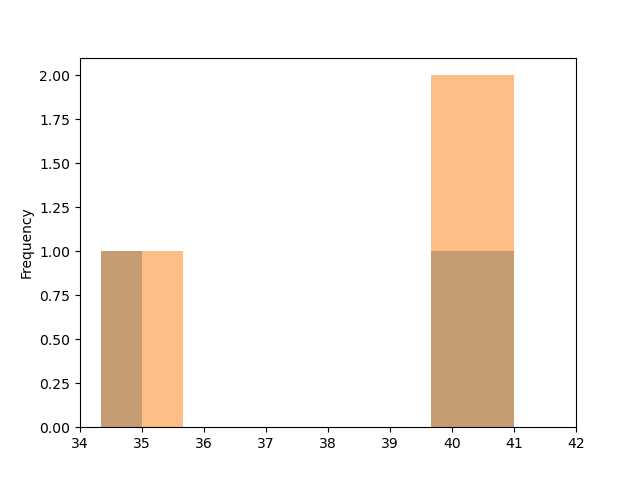

In [37]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

In [40]:
ax = ser.plot.hist(bins = 5,alpha=0.5)

In [42]:
ax.set_xlim([34,42])

(34.0, 42.0)

<IPython.core.display.Javascript object>


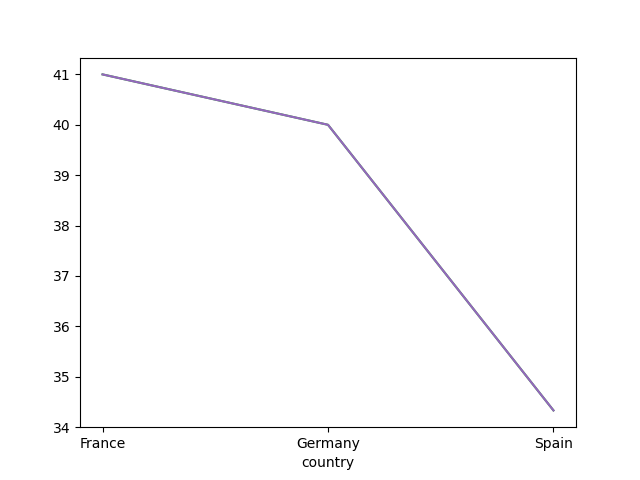

In [51]:
# best use hist from matplot
fig= plt.figure()
ax = fig.add_subplot(1,1,1)

In [55]:
list(ser.index)

['France', 'Germany', 'Spain']

In [57]:
list[ser.values]

TypeError: 'type' object is not subscriptable

In [58]:
ax.hist(list(ser.index),ser.values,bins=3, alpha=0.5)

TypeError: hist() got multiple values for argument 'bins'

In [59]:
ser

country
France     41.000000
Germany    40.000000
Spain      34.333333
Name: age, dtype: float64

In [64]:
ser.plot()

<AxesSubplot:xlabel='country'>

<IPython.core.display.Javascript object>


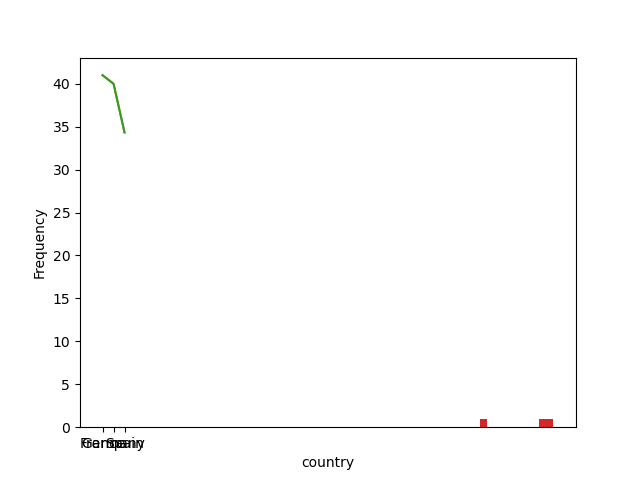

In [65]:
fig = plt.figure()

In [72]:
plt.plot(list[ser.index],ser.values,'ko')

TypeError: 'type' object is not subscriptable

In [75]:
df.groupby('country')['age'].mean().plot.hist()

<AxesSubplot:xlabel='country', ylabel='Frequency'>

<IPython.core.display.Javascript object>


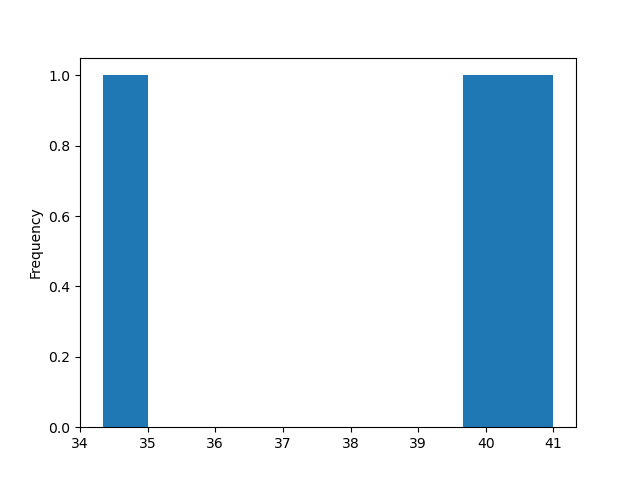

In [76]:
fig = plt.figure()

In [77]:
df.groupby('country')['age'].mean().plot.hist()

<AxesSubplot:ylabel='Frequency'>

In [78]:
df['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

<IPython.core.display.Javascript object>


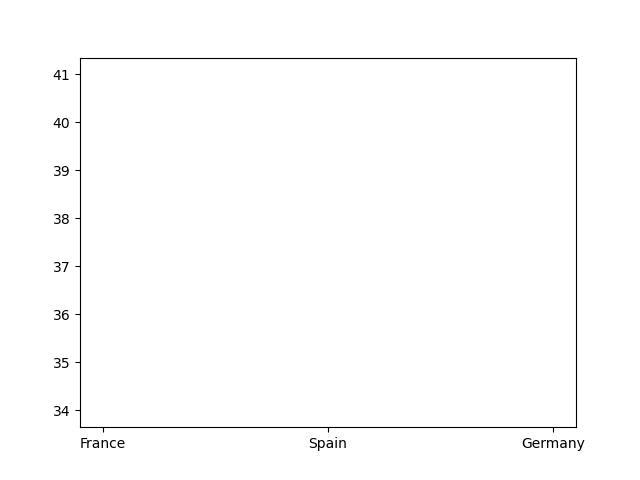

In [84]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

In [89]:
for country in df['country'].unique():
    ax.plot(country,int(df[df['country'] == country]['age'].mean()), label='{}'.format(country),'ko')

SyntaxError: positional argument follows keyword argument (<ipython-input-89-4e7c4e90c563>, line 2)

In [91]:
ser = df.groupby('country')['age'].mean()

In [92]:
ser

country
France     41.000000
Germany    40.000000
Spain      34.333333
Name: age, dtype: float64

In [93]:
import numpy as np 
ser.astype(np.int32)

country
France     41
Germany    40
Spain      34
Name: age, dtype: int32

<IPython.core.display.Javascript object>


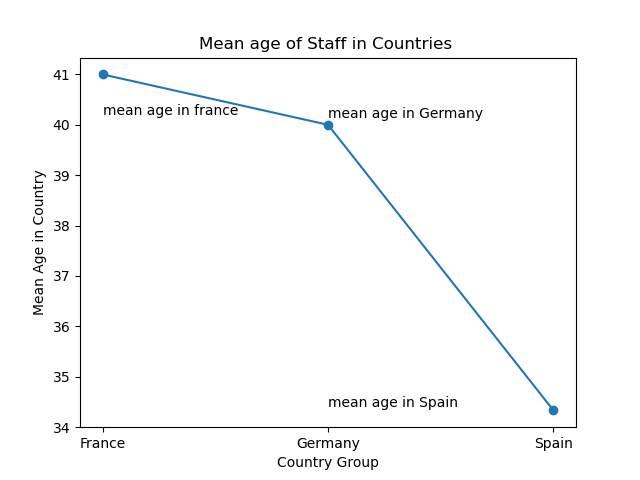

In [151]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

In [152]:
ax.plot(list(ser.index), ser.values,'o-')

In [153]:
ax.set_title("Mean age of Staff in Countries ")
ax.set_xlabel("Country Group")
ax.set_ylabel("Mean Age in Country")

Text(46.972222222222214, 0.5, 'Mean Age in Country')

In [154]:
ax.text('France', 40.2, "mean age in france")

Text(France, 40.2, 'mean age in france')

In [155]:
ax.text('Germany',40.14,'mean age in Germany')

Text(Germany, 40.14, 'mean age in Germany')

In [156]:
ax.text('Germany',34.40,'mean age in Spain')

Text(Germany, 34.4, 'mean age in Spain')

In [157]:
df.head()

,country,age,salary,purchased
0,France,44,72000.000000,No
1,Spain,27,48000.000000,Yes
2,Germany,30,54000.000000,No
3,Spain,38,61000.000000,No
4,Germany,40,63777.777778,Yes


In [183]:
df.groupby('country')['purchased'].value_counts()

country  purchased
France   Yes          3
         No           1
Germany  No           2
         Yes          1
Spain    No           2
         Yes          1
Name: purchased, dtype: int64

In [187]:
yes_puch = []
for country in df['country'].unique():
    yes_puch.append(df[(df['country'] == country) &( df['purchased'] == 'Yes')]['purchased'].count())
    
yes_puch

[3, 1, 1]

<IPython.core.display.Javascript object>


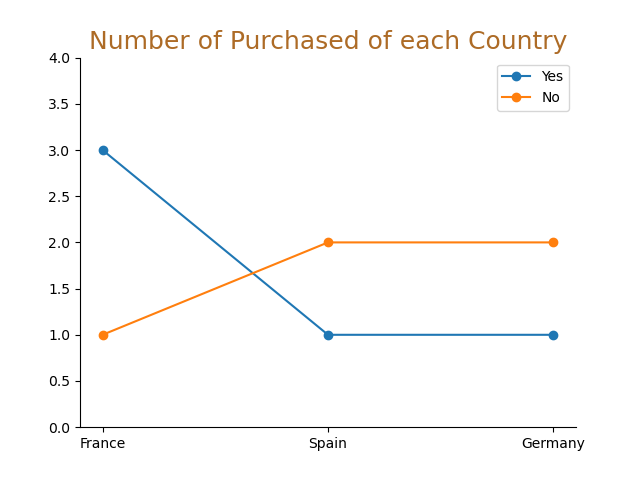

(0.0, 4.0)

In [210]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(df['country'].unique(),yes_puch,'-o', label='Yes')
ax.set_title('Number of Purchased of each Country',color='#ad6b26', fontsize=18)
ax.set_ylim([0,4])

In [211]:
# now label
no_purc = []
for country in df['country'].unique():
    no_purc.append(df[(df['country'] == country) &( df['purchased'] == 'No')]['purchased'].count())
    
ax.plot(df['country'].unique(),no_purc,'-o', label='No')


In [212]:
ax.legend(loc='best')

In [213]:
# we remove border right and top
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [214]:
plt.savefig("purchased.png",dpi=400, bbox_inches='tight',facecolor='#5caef7')